# IMDB Reviews Stemming
This notebook performs stemming on the IMDB movie reviews dataset using PorterStemmer and SnowballStemmer. It preprocesses the text data, analyzes vocabulary size, and visualizes the most frequent words for both stemmers.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Load the IMDB dataset
dataset = pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Encode sentiment labels (positive=1, negative=0)
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# Download required NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Initialize stopwords set and stemmers
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer(language='english')

In [6]:
# Stem the first 50,000 reviews using PorterStemmer
porter_corpus = []
for review in dataset['review'][:50000]:
    # Remove HTML tags and non-alphabetic characters
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    # Convert to lowercase and split into words
    words = review.lower().split()
    # Stem and remove stopwords
    stemmed_words = [porter_stemmer.stem(word) for word in words if word not in stop_words]
    # Join back to string
    porter_corpus.append(' '.join(stemmed_words))

In [7]:
# Calculate vocabulary size after PorterStemmer
porter_vocab_size = len(set(' '.join(porter_corpus).split()))
print(f"Vocabulary size after PorterStemmer: {porter_vocab_size}")

Vocabulary size after PorterStemmer: 69011


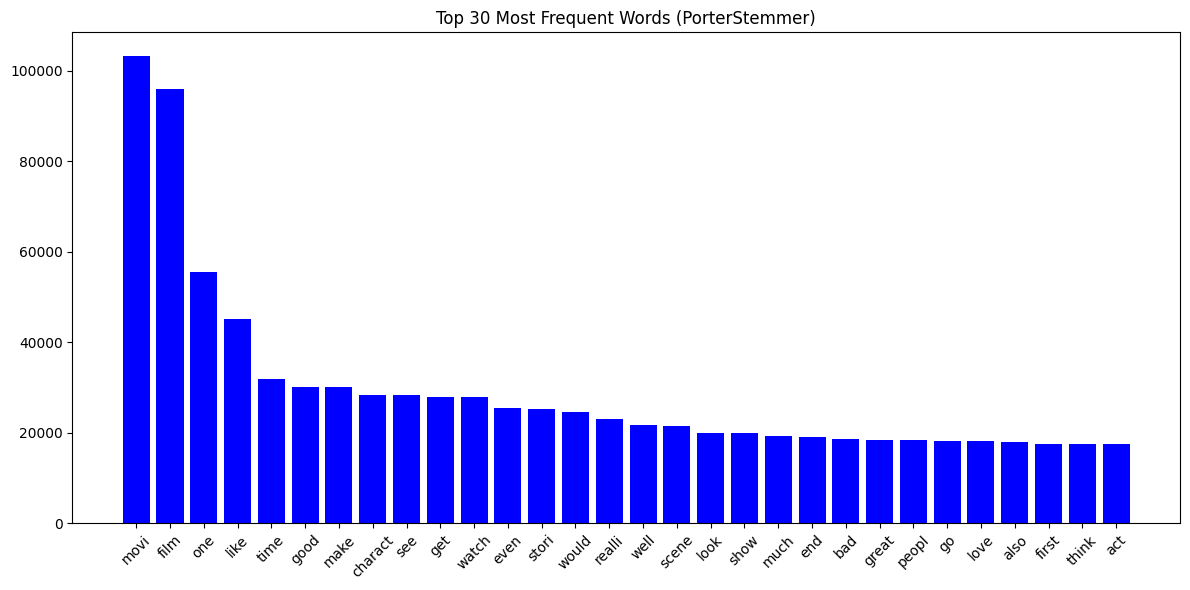

In [8]:
# Display top 30 most frequent words after PorterStemmer
porter_word_freq = Counter(' '.join(porter_corpus).split())
top_30_porter = porter_word_freq.most_common(30)
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_porter], [freq for word, freq in top_30_porter], color='blue')
plt.title('Top 30 Most Frequent Words (PorterStemmer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

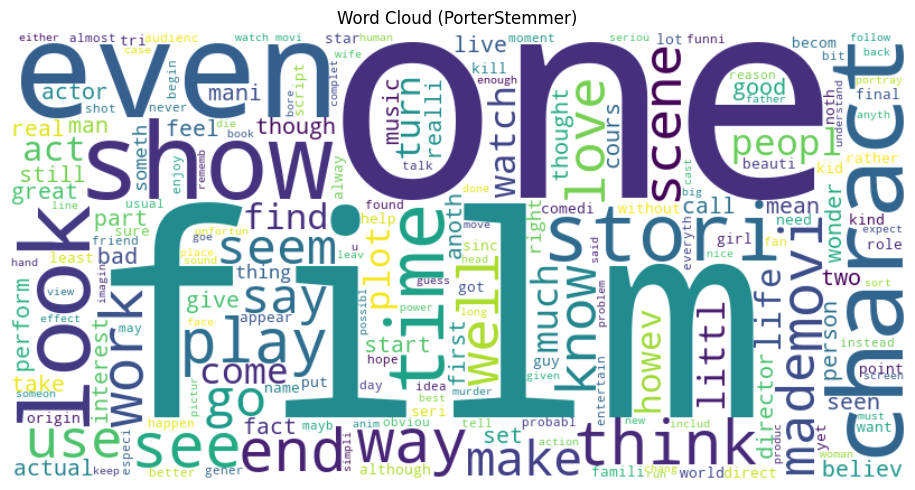

In [9]:
# Generate and display word cloud for PorterStemmer
porter_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(porter_corpus))
plt.figure(figsize=(10, 5))
plt.imshow(porter_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (PorterStemmer)')
plt.tight_layout()
plt.show()

In [10]:
# Stem the first 50,000 reviews using SnowballStemmer
snowball_corpus = []
for review in dataset['review'][:50000]:
    # Remove HTML tags and non-alphabetic characters
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    # Convert to lowercase and split into words
    words = review.lower().split()
    # Stem and remove stopwords
    stemmed_words = [snowball_stemmer.stem(word) for word in words if word not in stop_words]
    # Join back to string
    snowball_corpus.append(' '.join(stemmed_words))

In [11]:
# Calculate vocabulary size after SnowballStemmer
snowball_vocab_size = len(set(' '.join(snowball_corpus).split()))
print(f"Vocabulary size after SnowballStemmer: {snowball_vocab_size}")

Vocabulary size after SnowballStemmer: 68203


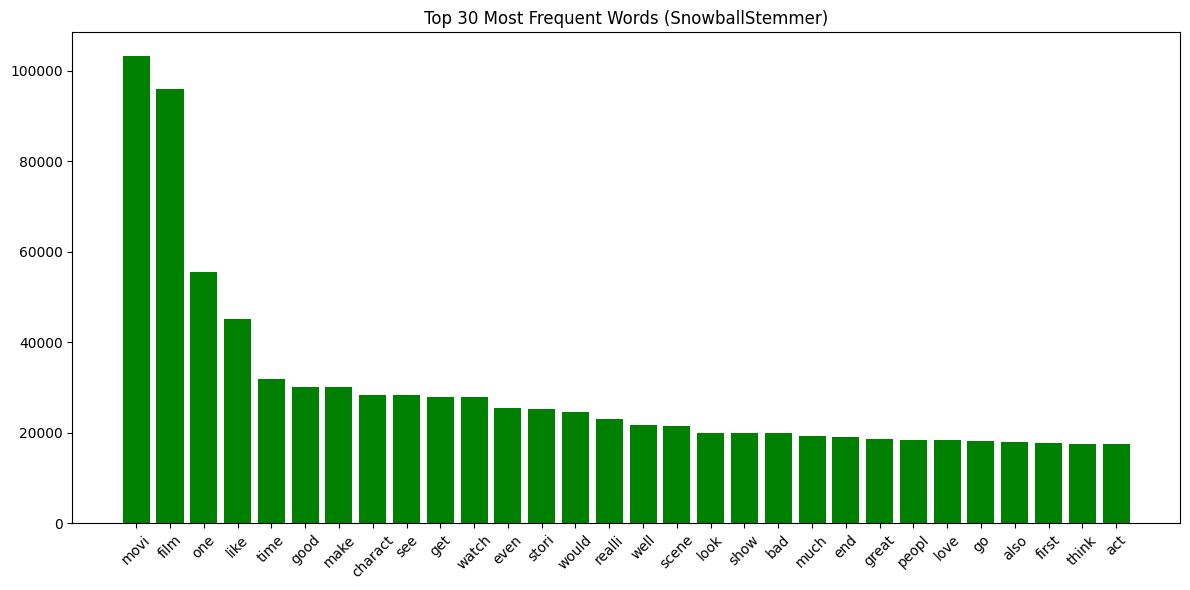

In [12]:
# Display top 30 most frequent words after SnowballStemmer
snowball_word_freq = Counter(' '.join(snowball_corpus).split())
top_30_snowball = snowball_word_freq.most_common(30)
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_snowball], [freq for word, freq in top_30_snowball], color='green')
plt.title('Top 30 Most Frequent Words (SnowballStemmer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

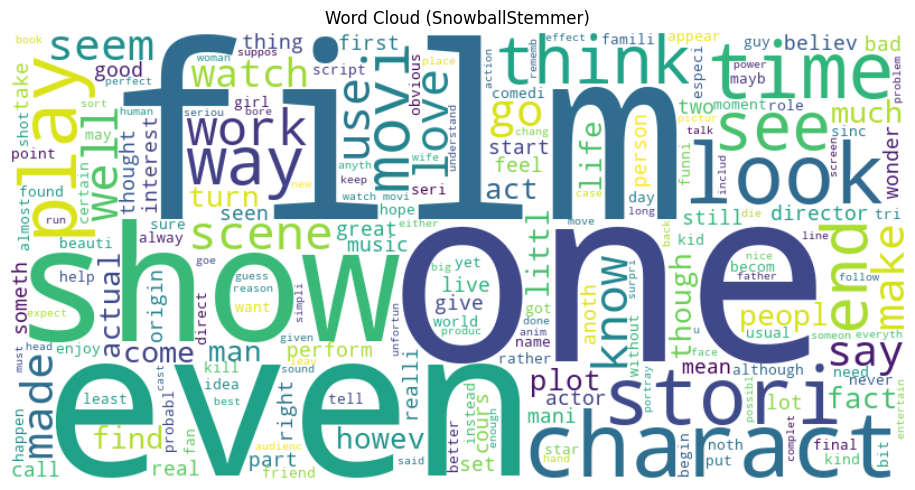

In [13]:
# Generate and display word cloud for SnowballStemmer
snowball_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(snowball_corpus))
plt.figure(figsize=(10, 5))
plt.imshow(snowball_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (SnowballStemmer)')
plt.tight_layout()
plt.show()

## Analysis
- The vocabulary size after PorterStemmer is calculated to understand the effect of aggressive stemming.
- SnowballStemmer tends to retain more unique words compared to PorterStemmer, indicating less aggressive stemming.
- The bar plots and word clouds visualize the frequency and distribution of words for both stemmers, highlighting differences in vocabulary richness.